In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.fft import * 
import sounddevice as sd

import librosa
import librosa.display


In [4]:
def sinus(amplitude, frequency, phase, time):
    return amplitude * np.sin(2 * np.pi * frequency * time + phase)

In [5]:
def split_signal(signal, min_val = 10):
    new_signal = []
    current_note = []
    for val in signal:
        if abs(val) > min_val:
            current_note.append(val)
        elif abs(val) < min_val:
            if current_note != []:
                new_signal.append(current_note)
                current_note = [] 
        
    return new_signal

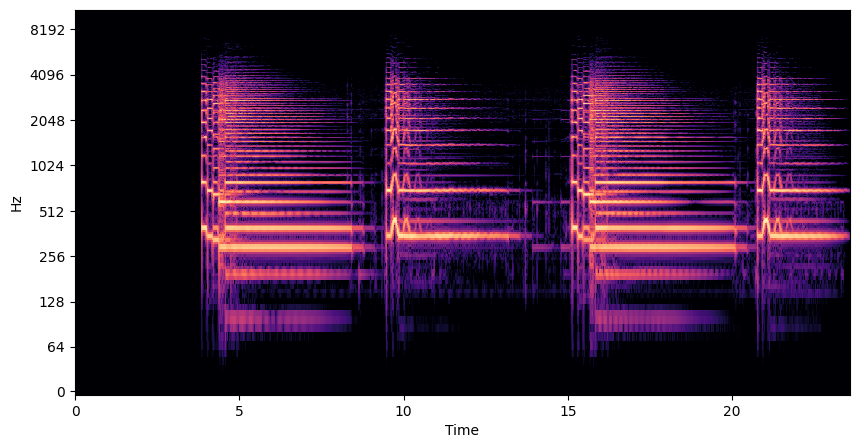

In [6]:
y, sr = librosa.load('./test-mono.wav')


# sd.play(y, samplerate=sr)

D = librosa.stft(y)


S_db = librosa.amplitude_to_db(np.abs(D), ref= np.max)


mel_spec = librosa.feature.melspectrogram(y= y, sr = sr, n_mels = 128)


mel_spec_db = librosa.amplitude_to_db(mel_spec, ref= np.max)

 
fig, axs = plt.subplots(figsize = (10, 5))

img = librosa.display.specshow(S_db, x_axis="time", y_axis="log", ax=axs)




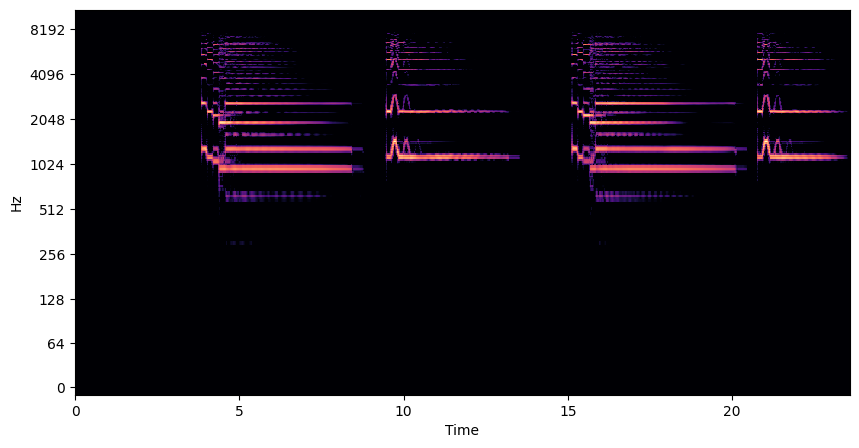

In [7]:
mel_spec = librosa.feature.melspectrogram(y= y, sr = sr, n_mels = 512)


mel_spec_db = librosa.amplitude_to_db(mel_spec, ref= np.max)

 
fig, axs = plt.subplots(figsize = (10, 5))

img = librosa.display.specshow(mel_spec_db, x_axis="time", y_axis="log", ax=axs)

In [13]:
onset_frames = librosa.onset.onset_detect(y, sr = sr , wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
onset_times = librosa.frames_to_time(onset_frames)

# plt.plot(y)

yf = rfft(y)
xf = rfftfreq(len(y), 1/ sr)

# plt.plot(y,onset_times, 'x')

with open("notes.txt", 'wt') as f:
    f.write('\n'.join([f'{onset_time}'for onset_time in onset_times]))


# for onset_time in onset_frames:
    # plt.axvline(x = onset_time,  color="red")


C:\Users\atud2\AppData\Local\Temp\ipykernel_16852\1041383801.py:1: FutureWarning: Pass y=[-1.2993594e-06  2.3454422e-06  3.2714252e-06 ...  6.5908189e-06
 -7.3883616e-06 -2.9497567e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_frames = librosa.onset.onset_detect(y, sr = sr , wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)


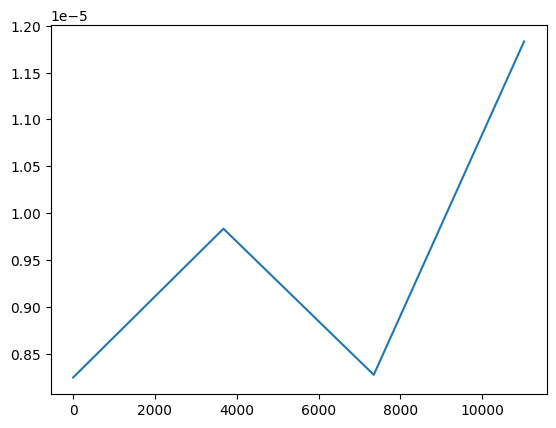

11025.0


In [9]:
# for idx in range(0):
idx = 5
note = y[int(onset_frames[idx])   : int(onset_frames[idx + 1] )]
sd.play(note)

yf = rfft(note)
xf = rfftfreq(len(note), 1 / sr )

plt.plot(xf, np.abs(yf))
plt.show()

idx = np.argmax(np.abs(yf))
freq = xf[idx]
print(freq)